In [1]:
import numpy as np
import torch
import json
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\usepackage{amssymb}"

In [2]:
def plot_experiments(data, labels, title, best_value, ylim=None):
    num_iterations = 100
    t = torch.linspace(0, num_iterations, num_iterations + 1)

    for i, algo in enumerate(labels):
        label = labels[algo][0]
        color = labels[algo][1]
        linestyle = labels[algo][2]

        utility = torch.log(best_value - data[algo])
        lower = utility.quantile(dim=0, q=0.25)
        middle = utility.quantile(dim=0, q=0.5)
        upper = utility.quantile(dim=0, q=0.75)

        plt.plot(t, middle, label=label, linewidth=3, color=color, linestyle=linestyle)
        plt.fill_between(
            t,
            upper,
            lower,
            alpha=0.15,
            color=color,
            edgecolor="w",
            linewidth=3,
        )
    if ylim is not None:
        plt.ylim(ylim)
    plt.xlim(0, num_iterations)
    plt.xticks(np.linspace(0, 100, 6), fontsize=20)
    plt.yticks(fontsize=20)
    plt.title(title, fontsize=25)
    plt.grid(alpha=0.5)
    return None

In [3]:
def plot_all_experiments(experiment_data, titles, best_values, ylim=None):
    fig, axes = plt.subplots(2, 2, figsize=(20, 10))
    plt.subplots_adjust(
        left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.25
    )

    for i, _ in enumerate(experiment_data):
        plt.subplot(2, 2, 1 + i)
        plot_experiments(
            data=experiment_data[i],
            labels=algos_dict,
            title=titles[i],
            best_value=best_values[i],
            ylim=None,
        )
        if 1 + i > 2:
            plt.xlabel("Iteration", fontsize=25)

        if 1 + i in [1, 3]:
            plt.ylabel("Log regret", fontsize=25)

    handles = []
    labels = []

    for a in ordered_algos:
        label = algos_dict[a][0]
        color = algos_dict[a][1]
        linestyle = algos_dict[a][2]
        line = mlines.Line2D([], [], color=color, linestyle=linestyle, linewidth=5)
        patch = mpatches.Patch(color=color, alpha=0.25)
        handles += [(line, patch)]
        labels += [label]

    axes[1, 0].legend(
        handles=handles,
        labels=labels,
        loc=(0.5, -0.65),
        ncol=3,
        fontsize=25,
    )
    plt.show()
    return fig

In [4]:
ordered_algos = [
    "robust-eui-ucb",
    "robust-resi-ucb",
    "robust-eui-ts",
    "robust-resi-ts",
    "robust-eui",
    "robust-resi",
]

algos_dict = {
    "robust-eui-ucb": ["DRUI-UCB", "mediumseagreen", "-"],
    "robust-eui-ts": ["DRUI-TS", "dodgerblue", "-"],
    "robust-eui": ["EDRUI", "crimson", "-"],
    "robust-resi-ucb": ["DRSI-UCB", "mediumseagreen", "--"],
    "robust-resi-ts": ["DRSI-TS", "dodgerblue", "--"],
    "robust-resi": ["EDRSI", "crimson", "--"],
}

ordered_titles = ["rocket_mcvar", "truss_kl", "vehicle_cs", "penicillin_tv"]

experiments_dict = {
    "rocket_mcvar": ["rocket_mcvar_hv"],
    "truss_kl": ["truss_kl_hv"],
    "vehicle_cs": ["vehicle_cs_hv"],
    "penicillin_tv": ["penicillin_tv_hv"],
}

epsilons = ["0.0", "0.2", "0.4", "0.6", "0.8", "1.0"]

# General

In [5]:
mode = "general"

experiment_data = []
experiment = "rocket_mcvar_hv"
experiment_data += [torch.load(f"data/{experiment}_{mode}_data.pt")["0.2"]]

experiment = "truss_kl_hv"
experiment_data += [torch.load(f"data/{experiment}_{mode}_data.pt")["0.2"]]

experiment = "vehicle_cs_hv"
experiment_data += [torch.load(f"data/{experiment}_{mode}_data.pt")["0.2"]]

experiment = "penicillin_tv_hv"
experiment_data += [torch.load(f"data/{experiment}_{mode}_data.pt")["0.2"]]

titles = [
    r"FourBarTrussDesign($D$=3, $W$=1, $M$=2): KL($\tau$=0.2)",
    r"RocketInjector($D$=3, $W$=1, $M$=3): MCVaR($a$=0.2, $b$=10)",
    r"VehicleSafety($D$=3, $W$=2, $M$=3): CS($\tau$=0.2)",
    r"Penicillin($D$=4, $W$=3, $M$=3): TV($\tau$=0.2)",
]
best_values = [0.9, 0.9, 0.8, 0.75]

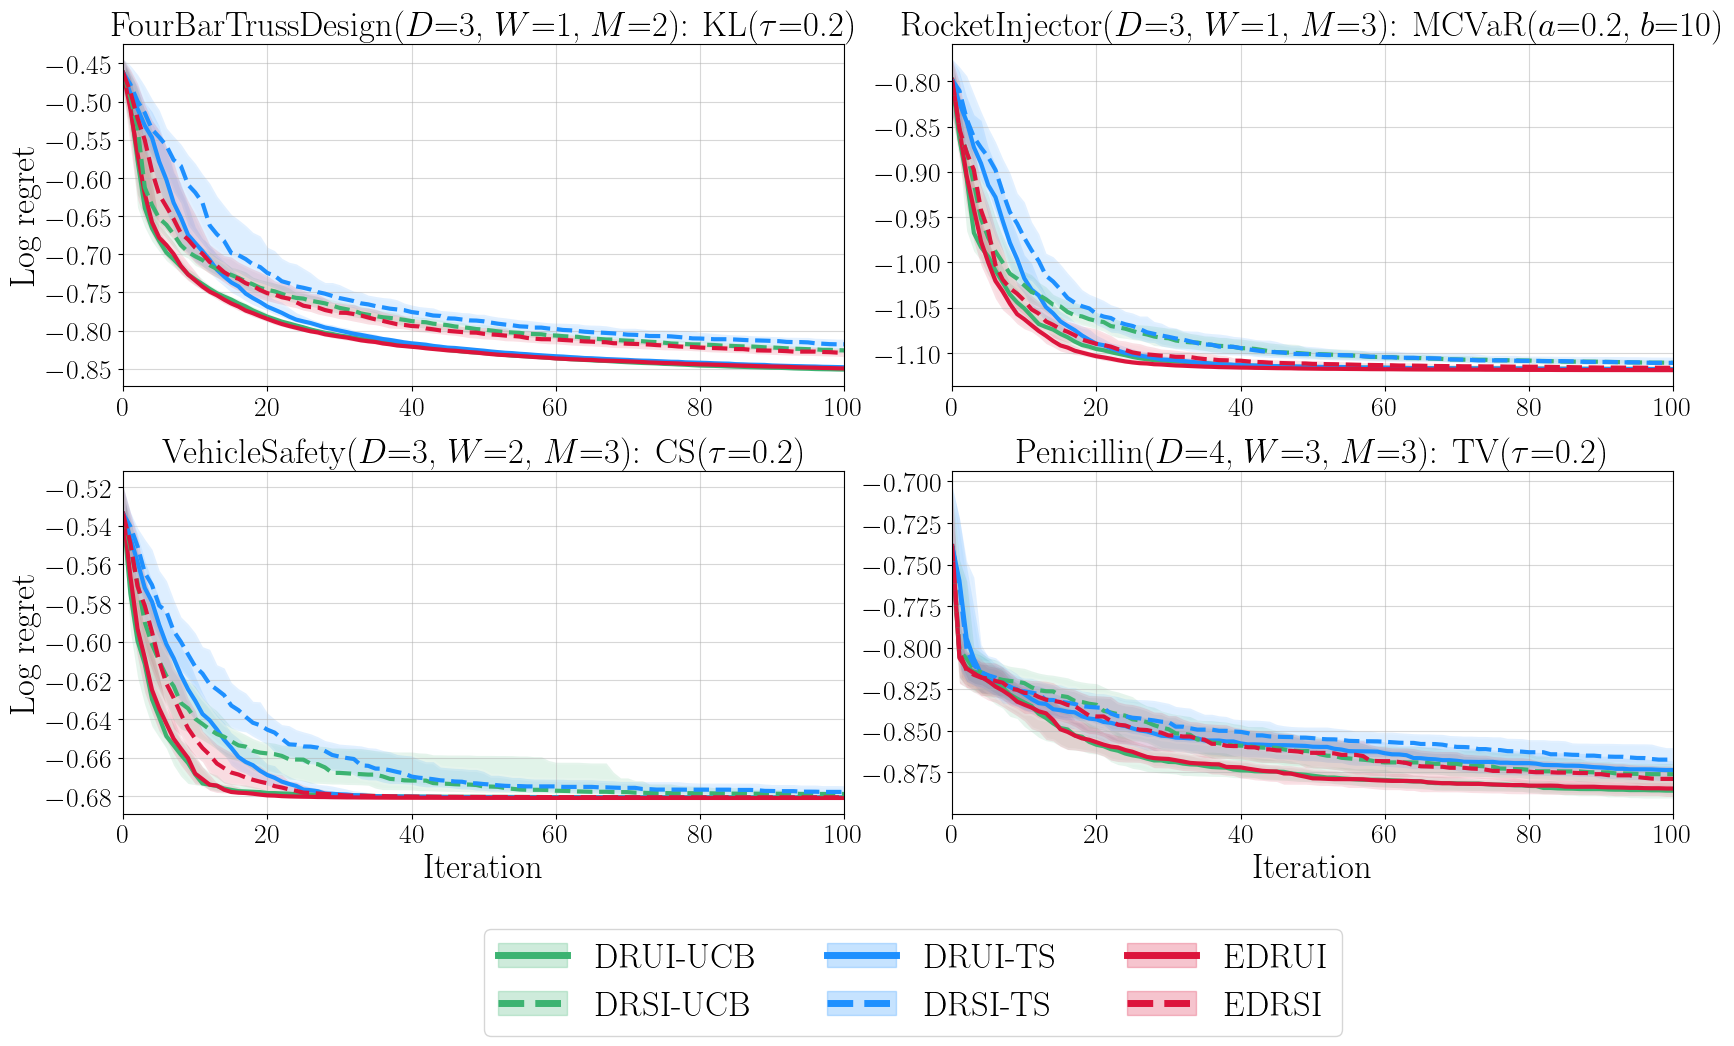

In [6]:
fig = plot_all_experiments(experiment_data, titles, best_values)